# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mohammad Hadi Morakabi Esfahani
2.   Student Number: 400205617


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
train_indexes = np.random.choice(dataset.index, size=int(len(dataset)*0.8), replace=False)
test_indexes = np.array(list(set(dataset.index) - set(train_indexes)))
x_train = dataset.iloc[train_indexes, 1]
y_train = dataset.iloc[train_indexes, 2]

x_test = dataset.iloc[test_indexes, 1]
y_test = dataset.iloc[test_indexes, 2]
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_test=x_test.reshape(-1,1)
x_train=x_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(400, 1) (400, 1) (100, 1) (100, 1)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = np.hstack([x_train, np.ones(x_train.shape)])
m = np.linalg.lstsq(A, y_train, rcond=None)[0]

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.31661898693807883
MSE test error: 0.38654481363913695


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

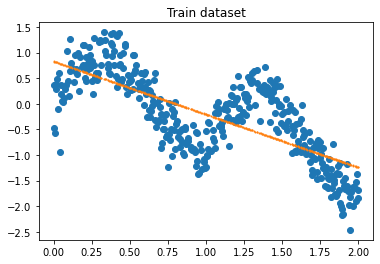

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

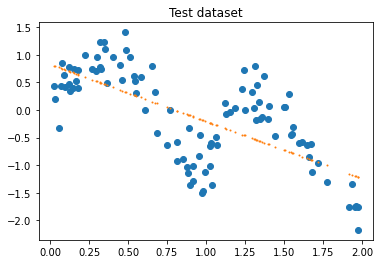

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

given that the range of y has a length equal to 4 the error(aproximately 0.3) is not acceptable

this lines only show the main changes and doesn't fit properly to the data in all ranges


because y and x are not related linearly , a line cannot describe the dataset well.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.linalg.norm(xi - the_query_point) ** 2 / (2 * hyperparameter ** 2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [11]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.pinv(X.T * (W * X)) * X.T * W * train_Y

    return float(qx * theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [13]:
predicted_test = [predict(x_train, y_train, query, 0.01) for query in x_test]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

C:\Users\mhme2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\matrixlib\defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: 0.10524373324260161


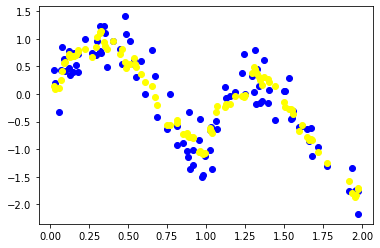

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

yes. because the points that are in the neighborhood have more weight the model is more precise 

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

yes. because the model is built based on nearest points the performance is better

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.sqrt(((x1 - x2) ** 2).sum())
        return distance

    def return_k_nearest_neighbours_to_x(self, x):
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = ...
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = ...
    return error, predicted_y

In [ ]:
k = ...
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-